In [ ]:
pip install python-mnist

In [ ]:
pip install idx2numpy

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            differences = self.X_train - x
            distances = np.sqrt(np.sum(differences**2, axis=1))
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return predictions

In [ ]:
import unittest

class TestKNN(unittest.TestCase):
    def setUp(self):
        self.X_train = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]])
        self.y_train = [0, 0, 1, 1, 1]
        self.knn = KNN(k=3)
        self.knn.fit(self.X_train, self.y_train)

    def test_initialization(self):
        """Test inicjalizacji KNN."""
        self.assertEqual(self.knn.k, 3)

    def test_fit(self):
        """Test, czy metoda fit poprawnie przechowuje dane treningowe."""
        np.testing.assert_array_equal(self.knn.X_train, self.X_train)
        np.testing.assert_array_equal(self.knn.y_train, self.y_train)

    def test_predict_single(self):
        """Test przewidywania dla pojedynczego punktu testowego."""
        prediction = self.knn.predict(np.array([[3, 3]]))
        self.assertEqual(prediction[0], 0)

    def test_predict_multiple(self):
        """Test przewidywania dla wielu punktów testowych."""
        X_test = np.array([[3, 3], [6, 5], [8, 9]])
        predictions = self.knn.predict(X_test)
        expected = [0, 1, 1]
        self.assertListEqual(predictions, expected)

    def test_accuracy_on_mock_data(self):
        """Test dokładności przewidywania na małym zbiorze danych testowych."""
        X_test = np.array([[3, 3], [6, 5], [8, 9]])
        y_test = [0, 1, 1]
        predictions = self.knn.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        self.assertAlmostEqual(accuracy, 1.0)


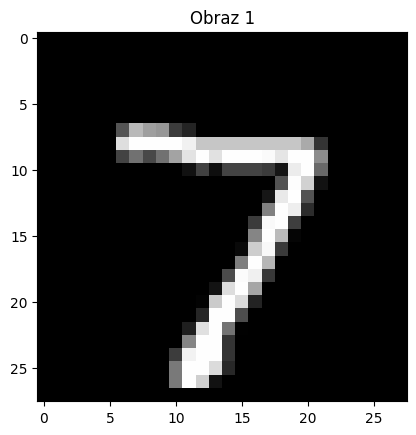

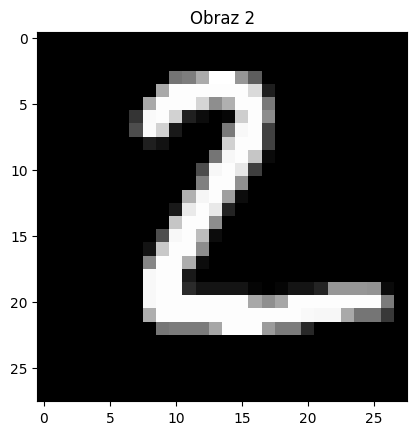

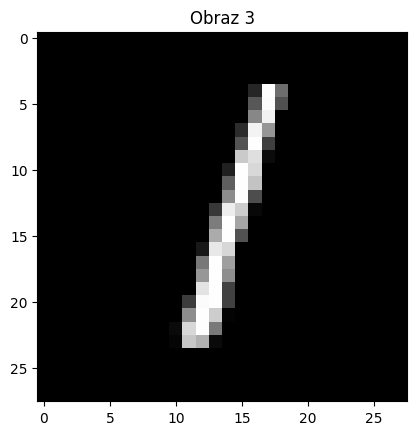

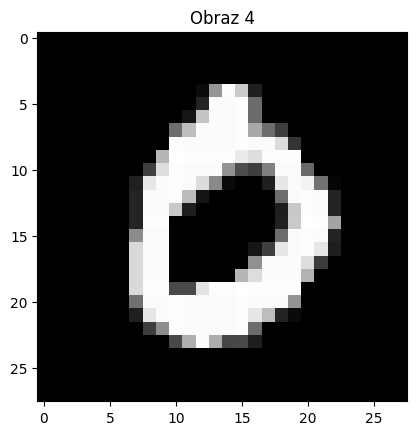

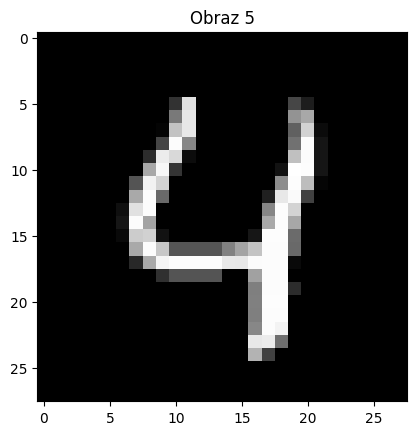

In [ ]:
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt

# Inicjalizacja MNIST
mndata = MNIST()

# Ładowanie danych testowych
X_test, y_test = mndata.load_testing()
data = np.array(X_test)

# Wyświetlanie pierwszych 5 obrazów
for i in range(5):
    image = data[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Obraz {i+1}")
    plt.show()
 # type: ignore

In [ ]:
import unittest
import numpy as np
from mnist import MNIST

class TestMNISTLoading(unittest.TestCase):
    def setUp(self):
        self.mndata = MNIST()
        self.X_test, self.y_test = self.mndata.load_testing()
        self.data = np.array(self.X_test)

    def test_data_loaded(self):
        """Test, czy dane MNIST zostały wczytane z poprawnymi wymiarami."""
        self.assertIsNotNone(self.data, "Dane X_test nie powinny być None")
        self.assertIsNotNone(self.y_test, "Etykiety y_test nie powinny być None")

        self.assertEqual(self.data.shape[1], 784, "Każdy obraz powinien mieć 784 piksele (28x28)")
        self.assertGreater(len(self.data), 0, "Dane powinny zawierać obrazy")
        self.assertGreater(len(self.y_test), 0, "Etykiety powinny zawierać wartości")

    def test_image_reshape(self):
        """Test, czy obrazy mogą być przekształcone do wymiarów 28x28."""
        for i in range(5):
            image = self.data[i].reshape(28, 28)
            self.assertEqual(image.shape, (28, 28), f"Obraz {i} powinien mieć wymiary 28x28 po przekształceniu")

    def test_labels_match_data(self):
        """Test, czy każdy obraz ma odpowiadającą etykietę."""
        self.assertEqual(len(self.data), len(self.y_test), "Każdy obraz powinien mieć odpowiadającą etykietę")


The best value of k is 6 with an accuracy of 0.8800


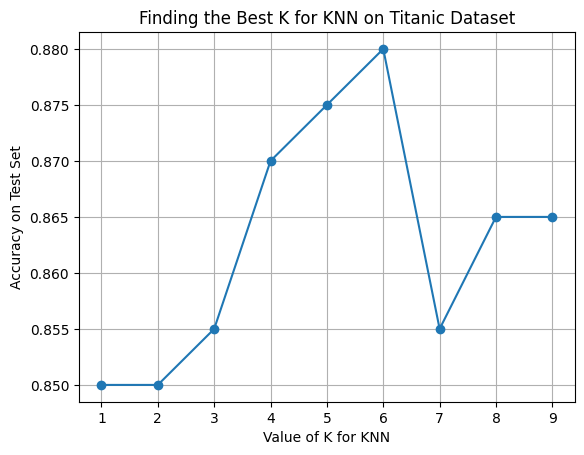

[7, 2, 1, 0, 4, 1, 9, 9, 4, 7, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 1, 5, 1, 4, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 1, 7, 2, 9, 9, 7, 9, 0, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 9, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 7, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 9, 4, 5, 1, 5, 6, 0, 3, 1, 4, 6, 5, 4, 6, 5, 4, 5, 1, 9, 4, 7, 2, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 2, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 1, 1, 6, 9, 2]
Dokładność modelu: 88.00%


In [ ]:
from mnist import MNIST
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


mndata = MNIST()
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()

X_train = np.array(X_train)[:1000]
y_train = np.array(y_train)[:1000]
X_test = np.array(X_test)[:200]
y_test = np.array(y_test)[:200]


k_values = range(1, 10)
k_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_scores.append(accuracy)

# Znalezienie najlepszego k
best_k = k_values[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"The best value of k is {best_k} with an accuracy of {best_score:.4f}")

# Rysowanie wykresu dokładności dla różnych wartości k
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy on Test Set')
plt.title('Finding the Best K for KNN on Titanic Dataset')
plt.grid()
plt.show()

knn = KNN(k=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test[:1000])

#Wyniki
print(predictions)
accuracy = accuracy_score(y_test[:1000], predictions)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")

In [ ]:
import unittest
import numpy as np
from mnist import MNIST
from sklearn.metrics import accuracy_score

class TestKNNWithMNIST(unittest.TestCase):

    def setUp(self):
        mndata = MNIST()
        self.X_train, self.y_train = mndata.load_training()
        self.X_test, self.y_test = mndata.load_testing()

        self.X_train = np.array(self.X_train)[:1000]
        self.y_train = np.array(self.y_train)[:1000]
        self.X_test = np.array(self.X_test)[:200]
        self.y_test = np.array(self.y_test)[:200]

        self.knn = KNN(k=3)
        self.knn.fit(self.X_train, self.y_train)

    def test_data_shape(self):
        """Test, czy wczytane dane mają odpowiednie kształty."""
        self.assertEqual(self.X_train.shape, (1000, 784), "Dane treningowe powinny mieć 1000 obrazów o wymiarach 784.")
        self.assertEqual(self.y_train.shape, (1000,), "Etykiety treningowe powinny mieć długość 1000.")
        self.assertEqual(self.X_test.shape, (200, 784), "Dane testowe powinny mieć 200 obrazów o wymiarach 784.")
        self.assertEqual(self.y_test.shape, (200,), "Etykiety testowe powinny mieć długość 200.")

    def test_prediction_accuracy(self):
        """Test dokładności przewidywania na zbiorze testowym."""
        predictions = self.knn.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, predictions)
        self.assertGreaterEqual(accuracy, 0.5, "Dokładność powinna być co najmniej 50%.")  # Prosty próg dokładności

    def test_best_k_selection(self):
        """Test znalezienia najlepszego k na zbiorze testowym."""
        k_values = range(1, 10)
        k_scores = []

        for k in k_values:
            knn = KNN(k=k)
            knn.fit(self.X_train, self.y_train)
            predictions = knn.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, predictions)
            k_scores.append(accuracy)

        best_k = k_values[np.argmax(k_scores)]
        self.assertIsInstance(best_k, int, "Najlepsza wartość k powinna być liczbą całkowitą.")
        self.assertGreaterEqual(best_k, 1, "Najlepsza wartość k powinna być co najmniej 1.")


The best value of k is 7 with an accuracy of 0.7902


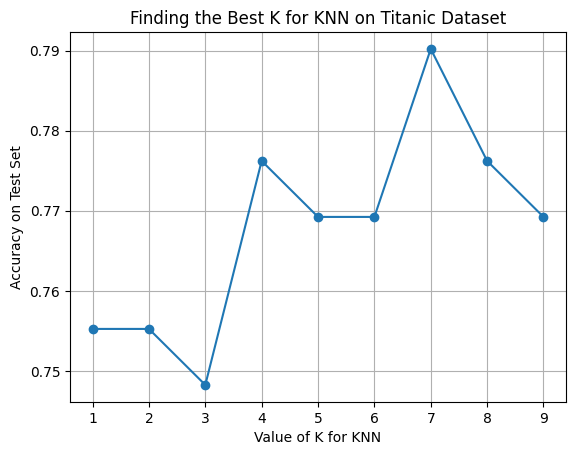

    Predicted
0           0
1           1
2           1
3           1
4           0
5           1
6           0
7           1
8           0
9           1
10          1
11          1
12          1
13          0
14          1
15          0
16          0
17          1
18          0
19          1
Dokładność modelu: 79.02%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

X = data.drop('Survived', axis=1)
y = data['Survived']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = range(1, 10)
k_scores = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    k_scores.append(accuracy)

best_k = k_values[np.argmax(k_scores)]
best_score = max(k_scores)

print(f"The best value of k is {best_k} with an accuracy of {best_score:.4f}")

plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy on Test Set')
plt.title('Finding the Best K for KNN on Titanic Dataset')
plt.grid()
plt.show()

knn = KNN(k=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Wyniki
results = pd.DataFrame({
    'Predicted': predictions,
})
print(results.head(20))

accuracy = accuracy_score(y_test, predictions)
print(f"Dokładność modelu: {accuracy * 100:.2f}%")

In [ ]:
import unittest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

class TestKNNWithTitanic(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
        data = pd.read_csv(url)

        data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
        label_encoder = LabelEncoder()
        data['Sex'] = label_encoder.fit_transform(data['Sex'])
        cls.X = data.drop('Survived', axis=1)
        cls.y = data['Survived']

        scaler = StandardScaler()
        cls.X = scaler.fit_transform(cls.X)

        cls.X_train, cls.X_test, cls.y_train, cls.y_test = train_test_split(cls.X, cls.y, test_size=0.2, random_state=42)

    def test_data_shape(self):
        """Test, czy wczytane i przetworzone dane mają odpowiednie kształty."""
        self.assertEqual(self.X_train.shape[1], 6, "Zmienna X_train powinna mieć 6 cech.")
        self.assertGreater(len(self.y_train), 0, "Zmienna y_train nie powinna być pusta.")
        self.assertGreater(len(self.y_test), 0, "Zmienna y_test nie powinna być pusta.")

    def test_knn_accuracy_range(self):
        """Test, czy dokładność modelu KNN mieści się w rozsądnym zakresie."""
        knn = KNN(k=3)
        knn.fit(self.X_train, self.y_train)
        predictions = knn.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, predictions)
        self.assertGreaterEqual(accuracy, 0.5, "Dokładność modelu powinna być co najmniej 50%.")

    def test_best_k_selection(self):
        """Test wyboru najlepszego k na podstawie dokładności."""
        k_values = range(1, 10)
        k_scores = []

        for k in k_values:
            knn = KNN(k=k)
            knn.fit(self.X_train, self.y_train)
            predictions = knn.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, predictions)
            k_scores.append(accuracy)

        best_k = k_values[np.argmax(k_scores)]
        best_score = max(k_scores)

        self.assertIsInstance(best_k, int, "Najlepsza wartość k powinna być liczbą całkowitą.")
        self.assertGreaterEqual(best_k, 1, "Najlepsza wartość k powinna być co najmniej 1.")
        self.assertGreaterEqual(best_score, 0.5, "Najlepsza dokładność powinna być co najmniej 50%.")

    def test_final_model_accuracy(self):
        """Test końcowej dokładności modelu przy użyciu najlepszego k."""
        knn = KNN(k=3)
        knn.fit(self.X_train, self.y_train)
        predictions = knn.predict(self.X_test)
        final_accuracy = accuracy_score(self.y_test, predictions)
        self.assertGreaterEqual(final_accuracy, 0.5, "Dokładność końcowa modelu powinna być co najmniej 50%.")

# Uruchomienie testów
unittest.main(argv=[''], verbosity=2, exit=False)


test_accuracy_on_mock_data (__main__.TestKNN)
Test dokładności przewidywania na małym zbiorze danych testowych. ... ok
test_fit (__main__.TestKNN)
Test, czy metoda fit poprawnie przechowuje dane treningowe. ... ok
test_initialization (__main__.TestKNN)
Test inicjalizacji KNN. ... ok
test_predict_multiple (__main__.TestKNN)
Test przewidywania dla wielu punktów testowych. ... ok
test_predict_single (__main__.TestKNN)
Test przewidywania dla pojedynczego punktu testowego. ... ok
test_best_k_selection (__main__.TestKNNWithMNIST)
Test znalezienia najlepszego k na zbiorze testowym. ... ok
test_data_shape (__main__.TestKNNWithMNIST)
Test, czy wczytane dane mają odpowiednie kształty. ... ok
test_prediction_accuracy (__main__.TestKNNWithMNIST)
Test dokładności przewidywania na zbiorze testowym. ... ok
test_best_k_selection (__main__.TestKNNWithTitanic)
Test wyboru najlepszego k na podstawie dokładności. ... ok
test_data_shape (__main__.TestKNNWithTitanic)
Test, czy wczytane i przetworzone dane m